# Data Summary and Goal

## Summary

Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many waterpoints already established in the country, but some are in need of repair while others have failed altogether.

## Goal

Build a classifier to predict the condition of a water well, using information provided in the data. This information includes:
- Date
- Location
- Source
- Funder
- And more!

This data is from the DrivenData.org website. It is part of the "Pump It Up: Data Mining the Water Table" dfetition. DrivenData decided to split the data up into two sets, the "Training Set" and the "Test Set". 

It is implied by the names that we are to use the training set for creating our models, and the test set to test them. For this project, we considered merging the two dataframes in order to have more data to work with, however there are 59,400 entries in the training set and therefore more than enough to make good predicitons. 

If our models are subpar, we may merge the tables to aquire more data points to potentially improve model efficacy.

# Data Cleaning and Feature Engineering

## Import Libraries and Data

In [1]:
# Import Pandas
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignore all future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Load data into  Pandas dataframes
status_groups = pd.read_csv('status_groups.csv')
testset = pd.read_csv('test_set.csv')
df = pd.read_csv('training_set.csv')


# Let's add our target series to the dataframe!
status_groups.drop(['id'], axis=1, inplace=True)
df = pd.concat([df, status_groups], axis=1)

# Analyze shape of dataset
print(f'Shape of dataset: {df.shape}')
display(df.head())


Shape of dataset: (59400, 41)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## EDA and dropping Unneeded columns

In [ ]:
df.columns

PERMIT ------------------------------------------------------------------------------------------------------------------------

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(x='permit', hue='status_group', data=df)
plt.tight_layout()

Wells with permits have a larger functional to non-functional ration than those without.

REGION ------------------------------------------------------------------------------------------------------------------------

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(x='region', hue='status_group', data=df)
plt.tight_layout()

Region can be a good indicator of well status, because how many functional vs non-functional wells differ a lot from region to region. For example, if you were to pick a well at random in the region 'Iringa', you would most likely find a functional well, but if you picked a well at random in 'Mtwara', you would most likely find a non-functional well!

BASIN ------------------------------------------------------------------------------------------------------------------------

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(x='basin', hue='status_group', data=df)
plt.tight_layout()

There are some basins that are clearly more successful when establishing wells. Two regions that stick out are 'Ruvuma/Southern Coast' and 'Rufiji', because both of those basins seem to have a majority non-functional wells!

*** Since we are keeping basin, region, and latitude and longitude, we do not need any more columns that provide location data or it would become to noisy. 

CONSTRUCTION YEAR -------------------------------------------------------------------------------------------------------------

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(x='construction_year', hue='status_group', data=df)
plt.tight_layout()

When ignoring the data of contruction_year==0, we can clearly see that newer wells are functional more often, while older wells are non-functional more often.

MANAGEMENT ------------------------------------------------------------------------------------------------------------------------

In [ ]:
display(df.management.unique())
display(df.management_group.unique())

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(x='management', hue='status_group', data=df)
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(x='management_group', hue='status_group', data=df)
plt.tight_layout()

Both columns provide the same data however 'management' is more detailed, so we will keep that column and drop the other.

PAYMENT ------------------------------------------------------------------------------------------------------------------------

In [ ]:
display(df.payment.unique())
display(df.payment_type.unique())

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(x='payment', hue='status_group', data=df)
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(x='payment_type', hue='status_group', data=df)
plt.tight_layout()

'payment' and 'payment_type' are columns with identical data. We can drop one. We will drop 'payment'

QUANTITY ------------------------------------------------------------------------------------------------------------------------

In [ ]:
display(df.quantity.unique())
display(df.quantity_group.unique())

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(x='quantity', hue='status_group', data=df)
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(x='quantity_group', hue='status_group', data=df)
plt.tight_layout()

'quantity_group' and 'quantity' are identical columns. We can drop one, and we will drop 'quantity_group' because 'qauntity' is a title that is understood easier.

WATERPOINT TYPE ------------------------------------------------------------------------------------------------------------------------

In [ ]:
display(df.waterpoint_type.unique())
display(df.waterpoint_type_group.unique())

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(x='waterpoint_type_group', hue='status_group', data=df)
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(x='waterpoint_type', hue='status_group', data=df)
plt.tight_layout()

The two 'waterpoint_type' columns display redundant information. 'waterpoint_type' is more desireable because there are very noticeable difference between the two groups that 'waterpoint_type_group' joined; 'communal standpoint' and 'communal standpoint multiple'. The majority of wells with a waterpoint type of 'communal standpoint multiple' were non-functional, while the majority of wells with a waterpoint type of 'communal standpoint' were functional. This is an important difference we wish to express.

Overall, handpumps and communal standpoints (and to a lesser extent, improved spring) show a majority occurence of functional wells, while the rest show a majority occurence of non-functional wells

EXTRACTION TYPE ------------------------------------------------------------------------------------------------------------------------

In [ ]:
display(df['extraction_type_class'].unique())
display(df['extraction_type'].unique())
display(df['extraction_type_group'].unique())

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.countplot(x='extraction_type_class', hue='status_group', data=df)
plt.tight_layout()

The three 'extraction_type' columns display the same information, however both 'extraction_type' and 'extraction_type_group' have many more unique values than 'extraction_type_class'. When looking at the columns, it is clear that 'extraction_type_class' is more interpretable, and reduces the cardinality of this 'extraction_type' data considerably, without reducing its effectiveness in conveying the information it intends to. For this reason, we will be keeping 'extraction_type_class' and dropping the others.

Overall, the data of wells that use a gravity and handpump extraction type have the highest occurence of functional wells, while motorpump and other extraction type are most likely to be non-functional in comparison. Submersible also has a majority functional, however it is not as pronounced as handpump and gravity.

SOURCE  ------------------------------------------------------------------------------------------------------------------------

In [ ]:
display(df['source_class'].unique())
display(df['source'].unique())
display(df['source_type'].unique())

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.countplot(x='source', hue='status_group', data=df)
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.countplot(x='source_type', hue='status_group', data=df)
plt.tight_layout()

The three 'source' columns provide the same information, with 'source_class' being the least specific and 'source' being the most specific. 'Source' provides mroe detailed information without severely increasing cardinality, and therefore we will keep that column and drop the others.

Springs, rainwater harvesting, shallow wells, rivers, DBH machines, and hand boreholes (hand dtw) are most likely to be functional in comparison to the other source types. Noticeably, wells with their source as a river are fucntional significantly more often than if the source is a lake. This information was not conveyed in the 'source_type' column.

QUALITY ------------------------------------------------------------------------------------------------------------------------

In [ ]:
display(df.water_quality.unique())
display(df.quality_group.unique())

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.countplot(x='water_quality', hue='status_group', data=df)
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.countplot(x='quality_group', hue='status_group', data=df)
plt.tight_layout()

The 'water_quality' and 'quality_group' columns provide redundant information. 'quality_group' is more desireable than 'quality_group' even though the latter is more specific because the latter's specificity does not add any meaninful information to our analysis.

Water of 'good' quality results in mostly functional wells, while those classified as an 'unknown' quality are mostly non-functional. They are unknown potentially due to the well being out of commission for such a long time that the water quality was no longer known by the time of recording.

DROP COLUMNS AND DEAL WITH MISSING VALUES-------------------------------------------------------------------------------------------------------------------------

In [ ]:
df.isna().sum()[df.isna().sum()>0]

In [2]:
# Label encode the target variable
status_labels = {'status_group':{'non functional': 0, 'functional': 1, 'functional needs repair': 2}}
df = df.replace(status_labels)
df.status_group.value_counts()


# Drop redundant and unneeded columns
to_drop = ['scheme_name', 'recorded_by', 'wpt_name', 'extraction_type', 'extraction_type_group',
           'region_code', 'district_code', 'lga', 'ward', 'public_meeting', 'date_recorded', 
           'source_type', 'source_class', 'waterpoint_type', 'water_quality', 'management_group', 
           'payment', 'quantity_group','subvillage', 'num_private', 'scheme_management']


# Deal with missing values
df.drop(to_drop, axis=1, inplace=True)
df.permit.fillna(False, inplace=True)
df.dropna(axis=0, inplace=True)

# Set 'id' as the index of the dataframe
df.set_index('id', inplace=True)

## Grouping and Labeling Column Values

In [3]:
# Funder
df.funder.replace(to_replace='0', value='unknown', inplace=True)
df.funder.value_counts().head(20)

Government Of Tanzania    9080
Danida                    3114
Hesawa                    2197
Rwssp                     1373
World Bank                1338
Kkkt                      1287
World Vision              1239
Unicef                    1057
Tasaf                      876
District Council           842
Dhv                        829
Private Individual         826
Dwsp                       811
unknown                    777
Norad                      764
Germany Republi            610
Tcrs                       601
Ministry Of Water          586
Water                      583
Dwe                        484
Name: funder, dtype: int64

In [4]:
other = list(df.funder[df['funder'].map(df['funder'].value_counts()) < 484].values)
other
df['funder'].replace(other, 'other', inplace=True)

df.funder.replace(to_replace='0', value='Unknown', inplace=True)


In [5]:
# Installer

other = list(df.installer[df['installer'].map(df['installer'].value_counts()) < 392].values)
other
df['installer'].replace(other, 'other', inplace=True)

In [6]:
# Population

df['population'].replace(to_replace = 0 , value =df.population.mean(), inplace=True)
# Areas usually don't have zero population,so we are going to replace those values with the mean!

In [7]:
# Permit

df.permit.replace({True:1, False:0}, inplace=True)

In [8]:
# Population
    
def population(obs):
    s=''
    x=obs['population']
    if(0<x<=100):
        s='Less than 100'
    elif(100<x<=200):
        s='Between 100 and 200'
    elif(200<x<=300):
        s='Between 200 and 300'
    elif(300<x<=400):
        s='between 300 and 400'
    elif(400<x<=500):
        s='between 400 and 500'
    elif(500<x):
        s='Over 500'
    elif(x==0):
        s='No population'
    return s
df['population']=df.apply(population,axis=1)


In [9]:
# Construction year


conditions = [df['construction_year']==0, (df['construction_year']>=1960)&(df['construction_year']<=1970), (df['construction_year']>1970)&(df['construction_year']<=1980),
            (df['construction_year']>1980)&(df['construction_year']<=1990), (df['construction_year']>1990)&(df['construction_year']<=2000),
            (df['construction_year']>2000)&(df['construction_year']<=2010), df['construction_year']>2010]
choices = ['no_construction_year', '1960_1970', '1971_1980', '1981_1990', '1991_2000', '2001_2010', '2011_over']
df['construction_year'] = np.select(conditions, choices)


In [10]:
# Amount_tsh
# Bin
conditions = [df.amount_tsh==0,(df.amount_tsh>0)&(df.amount_tsh<=10),(df.amount_tsh>10)&(df.amount_tsh<=100), (df.amount_tsh>100)&(df.amount_tsh<=1000),
             (df.amount_tsh>1000)&(df.amount_tsh<=2000), (df.amount_tsh>2000)&(df.amount_tsh<=10000), (df.amount_tsh>10000)&(df.amount_tsh<=100000),
             df.amount_tsh>100000]
choices = ['zero', '1 to 10', '11 to 100', '101 to 1k', '1k to 2k', '2k to 10k', '10k to 100k', 'greater than 100k']
df['amount_tsh'] = np.select(conditions, choices)

In [11]:
df.gps_height = pd.qcut(df.gps_height, 8, duplicates='drop', 
        labels=['-90m - sea level', 'sea level to 46m', '46m to 393m', '393m to 1017m', '1017m to 1316m', '1316m to 1586.75m', '1586.75m to 2770m'])

# More visualizations

In [ ]:
df1 = df.loc[df['funder']== 'Government Of Tanzania']
df2 = df.loc[df['funder']== 'Tasaf']              
df3 = df.loc[df['funder']== 'Danida'] 
df4 = df.loc[df['funder']== 'Hesawa'] 
df5 = df.loc[df['funder']== 'Rwssp'] 
df6 = df.loc[df['funder']== 'World Bank'] 
df7 = df.loc[df['funder']== 'Kkkt'] 
df8 = df.loc[df['funder']== 'World Vision']
df9 = df.loc[df['funder']== 'Unicef'] 
df10 = df.loc[df['funder']== 'unknown'] 
df11 = df.loc[df['funder']== 'District Council'] 
df12 = df.loc[df['funder']== 'Dhv'] 
df13 = df.loc[df['funder']== 'Private Individual'] 
df14 = df.loc[df['funder']== 'Dwsp'] 
df15 = df.loc[df['funder']== 'Norad'] 
df16 = df.loc[df['funder']== 'Germany Republi']
df17 = df.loc[df['funder']== 'Tcrs']
df18 = df.loc[df['funder']== 'Ministry Of Water']
df19 = df.loc[df['funder']== 'Water']
df20 = df.loc[df['funder']== 'Dwe']

top_20 = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,
                    df13,df14,df15,df16,df17,df18,df19,df20], ignore_index=True)

fig, ax = plt.subplots(figsize=(20,20))
sns.countplot(x='funder', hue="status_group", data=top_20)
plt.tight_layout()

Who funded the well has a considerable effect on the functionality of it. Suprisingly, most funders have a higher non-functional rate than functional. Only the Government of Tanzani, Hesawa, World Bank, District Council, Norad, Tcrs, and Ministry of Water have a majority functional.
Private individuals seem to have the highest non-functional to functional ratio, followed by Germany Republic.

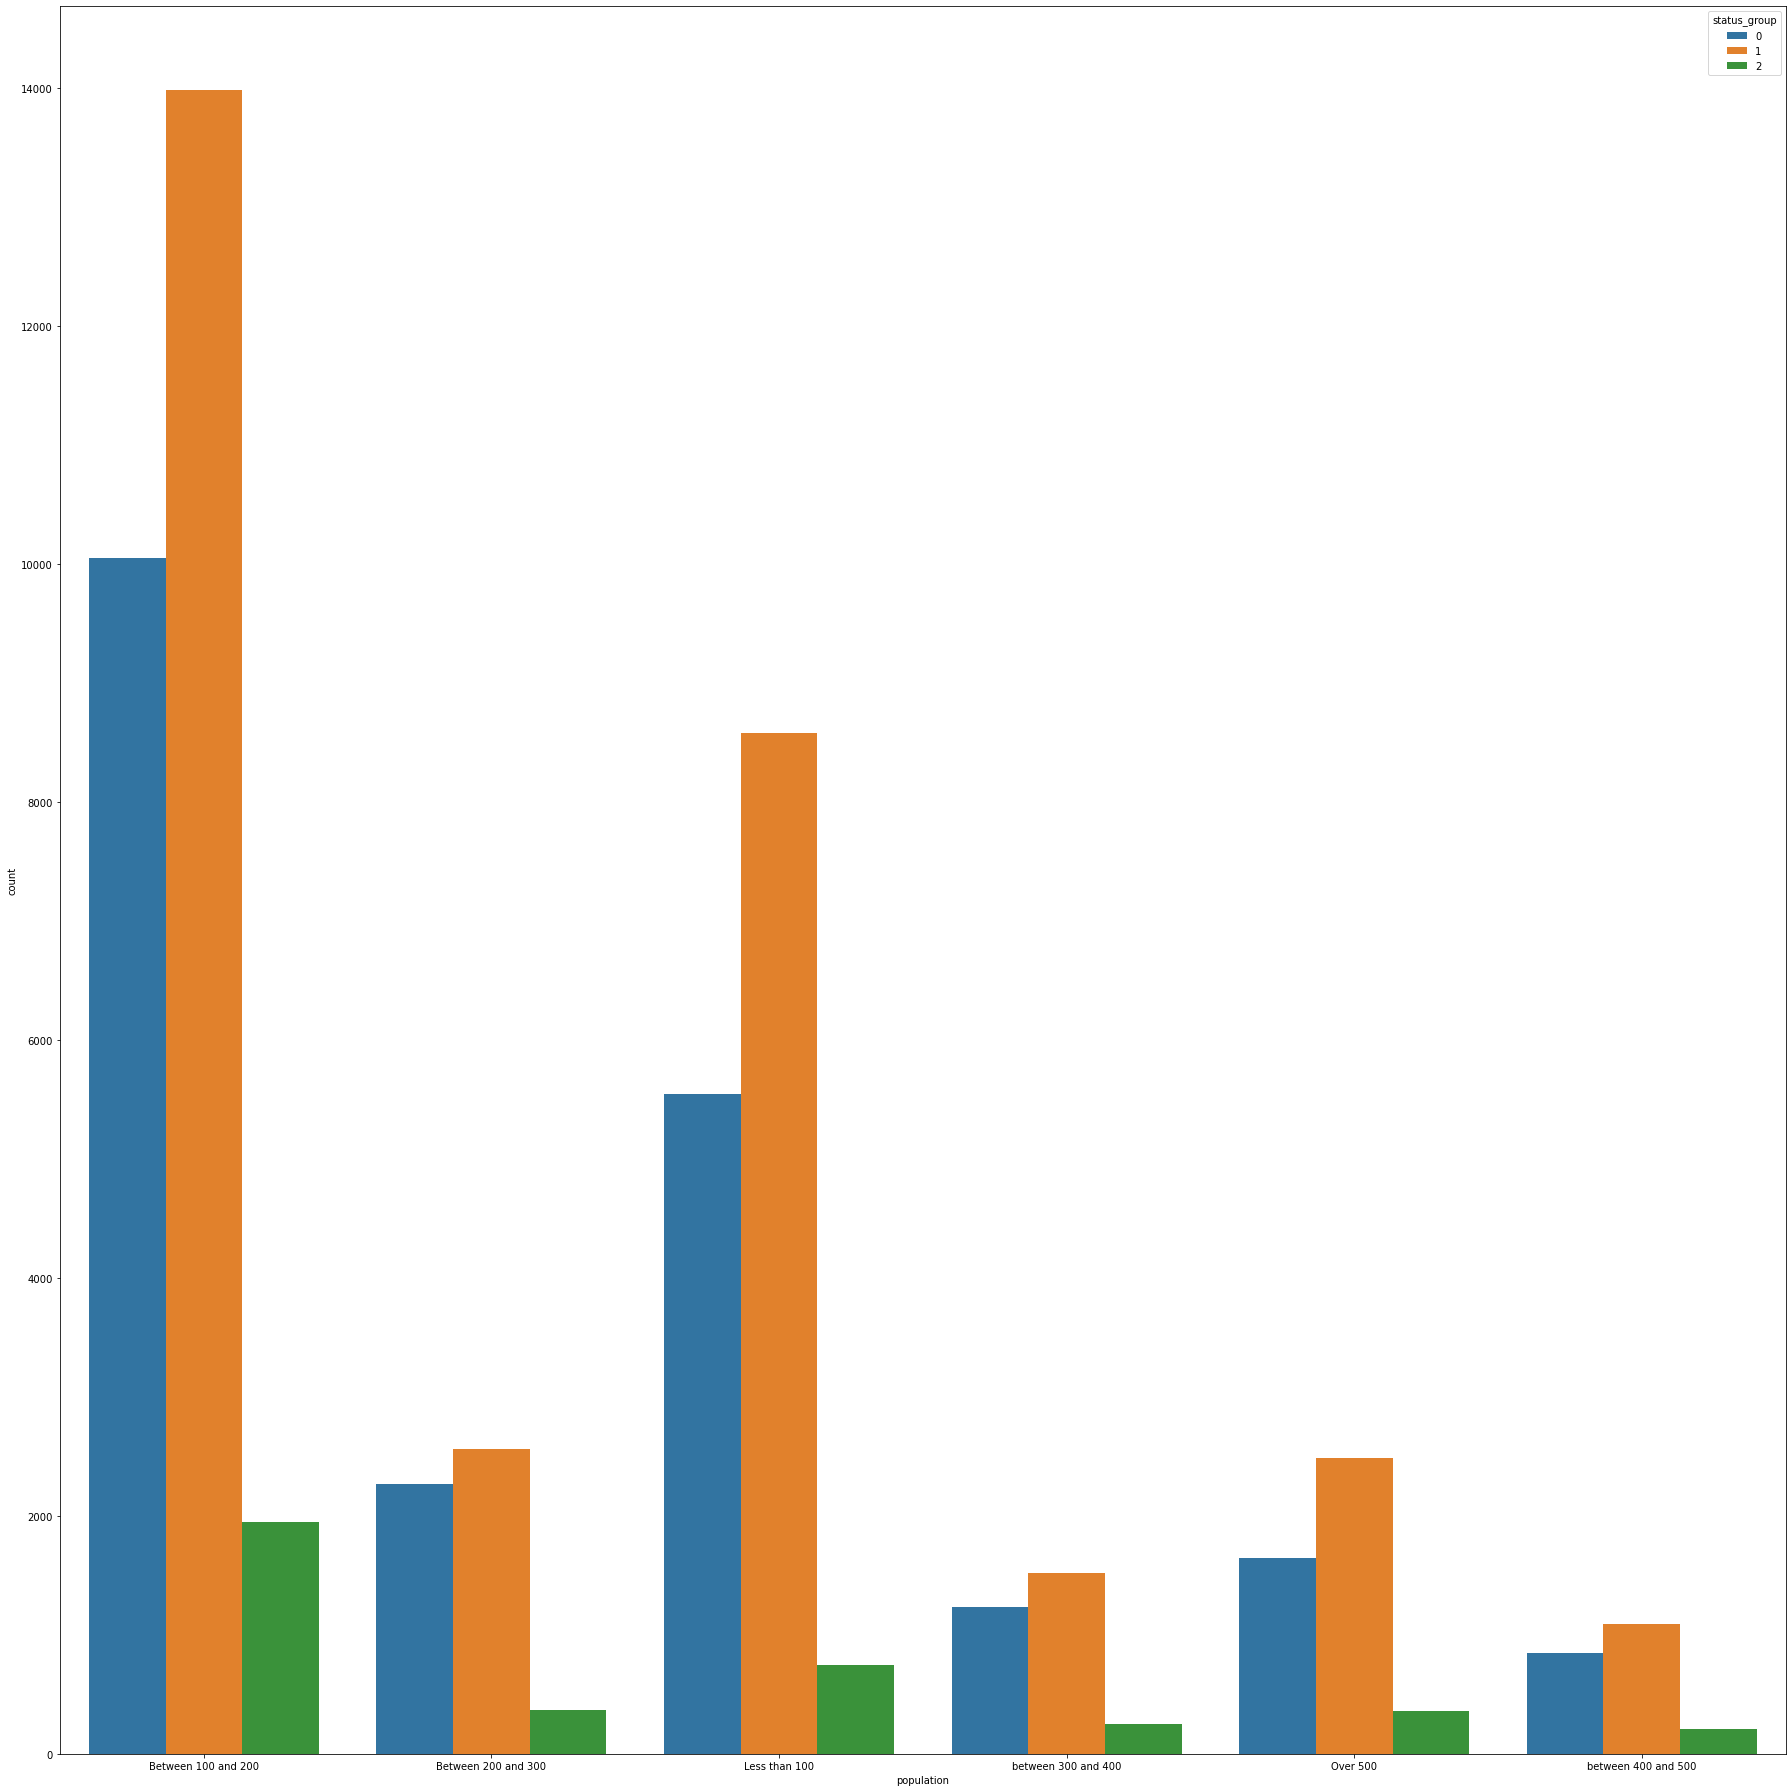

In [13]:
fig, ax = plt.subplots(figsize=(25,25))
sns.countplot(x='population', hue='status_group', data=df)
plt.tight_layout()

It seems that the higher the population around the well, the ratio of non-functional to functional generally decreases, indicating that higher populations could potentially result in a higher likelihood for functional wells.

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(x='latitude', y='longitude', hue='status_group',data=df)
plt.tight_layout()

NEED TO USE GEOPANDAS TO UNDERSTAND THIS BETTER

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x='amount_tsh', hue='status_group', data=df)
plt.tight_layout()

# Model Building

In [ ]:
df.status_group.value_counts().plot(kind='bar', color='orange')

There is a clear class imbalance for our target variable. We will have to deal with this during our modeling.


Potential methods:
- SMOTE
- Undersampling
- Ensemble methods
- Cost-sensitive algorithms

## Import Libraries/Modules

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# plot_confusion_matrix is a handy visual tool, added in the latest version of scikit-learn
# if you are running an older version, comment out this line and just use confusion_matrix

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

## Define X and y, Dummy, OneHotEncode

In [ ]:
# Identify features and target
features = df.drop('status_group', axis=1)
target = df.status_group

# Dummy the features
features_dummied = pd.get_dummies(features, drop_first=True)
features_dummied.head()

# OneHotEncode the features
encoder = OneHotEncoder()
features_ohe = encoder.fit_transform(features)

## Decision Tree

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_ohe, target, test_size=0.2, random_state=123)

In [ ]:
# Build model
tree = DecisionTreeClassifier(random_state=123)

# Train model
tree.fit(X_train, y_train)

# Score model
tree.score(X_test, y_test)

## Random Forest

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_ohe, target, test_size=0.2, random_state=123)

In [ ]:
# Build model
forest = RandomForestClassifier(random_state=123)

# Train model
forest.fit(X_train, y_train)

# Score model
forest.score(X_test, y_test)

## Naive Bayes

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_ohe, target, test_size=0.2, random_state=123)

In [ ]:
# Build model
nb = MultinomialNB()

# Train model
nb.fit(X_train, y_train)

# Score model
nb.score(X_test, y_test)

## XGBoost

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_ohe, target, test_size=0.2, random_state=123)

In [ ]:
# Build model
xg = XGBClassifier(random_state=123)

# Train model
xg.fit(X_train, y_train)

# Score model
xg.score(X_test, y_test)

## Support Vector

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_ohe, target, test_size=0.2, random_state=123)

# Recursive feature elimination
rfe = RFE(SVC(), n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)
rfe_columns = pd.Series(X_train.columns)
rfe_code = pd.Series(rfe.support_)
columns_to_keep = pd.concat([rfe_columns, rfe_code], axis=1)
rfe_X_train = X_train[list(columns_to_keep[columns_to_keep[1]==True][0])]
rfe_X_test = X_test[list(columns_to_keep[columns_to_keep[1]==True][0])]

In [ ]:
# Build model
svc = SVC(random_state=123, gamma='auto')

# Train model
svc.fit(X_train, y_train)

# Score model
svc.score(X_test, y_test)